<a href="https://colab.research.google.com/github/aneelabashir786/AI-ML-Tasks/blob/main/aneela_bashir_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries  ###

In [ ]:
import pandas as pd              # For handling CSV files and dataframes
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs and images
from sklearn.preprocessing import StandardScaler  # For scaling feature values
from sklearn.metrics import classification_report  # For model evaluation
from tensorflow.keras.models import Sequential     # Sequential model container
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # CNN layers
from tensorflow.keras.optimizers import Adam       # Optimizer for training
from tensorflow.keras.utils import to_categorical  # For one-hot encoding labels
from sklearn.model_selection import train_test_split  # For splitting train/validation sets
import joblib  # For saving/loading Python objects like scalers


###  Data Loading and Exploration ###

In [ ]:
# Load CSV files
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Display first 5 rows
print("First 5 rows of training data:")
print(train_df.head())


First 5 rows of training data:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  

In [ ]:
# Shapes
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (42000, 785)
Test shape: (28000, 784)


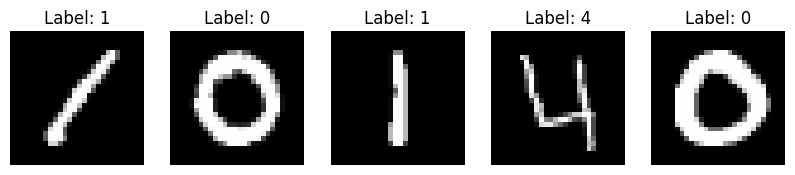

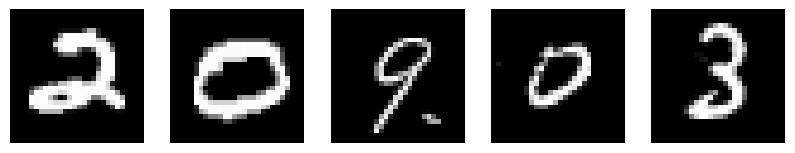

In [ ]:
# Visualize 5 train images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = train_df.iloc[i, 1:].values.reshape(28 , 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {train_df.iloc[i, 0]}")
    plt.axis('off')
plt.show()

# Visualize 5 test images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = test_df.iloc[i].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

### Data Preprocessing ###

In [ ]:
X = train_df.drop(columns=["label"]).values  # features only
y = train_df["label"].values  # labels


print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (42000, 784)
Labels shape: (42000,)


In [ ]:

# Normalize pixel values to 0–1 to speed up training, improve numerical stability,
# and help the model converge faster by keeping values in a small, consistent range
X_scaled = X.astype('float32') / 255.0

In [ ]:
# Reshape for CNN: (samples, height, width, channels)
X_scaled = X_scaled.reshape(-1, 28 , 28 , 1)

In [ ]:
# One-hot encode labels
y_cat = to_categorical(y)

In [ ]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_cat, test_size=0.2, random_state=42, stratify=y
)

### Model Building ###

In [ ]:

"""
Builds a Convolutional Neural Network (CNN) for image classification.
- Convolution + pooling layers extract spatial features from images.
- Dense layers learn complex patterns, and Dropout prevents overfitting.
- Final softmax layer outputs class probabilities for multi-class prediction.
"""


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_cat.shape[1], activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
"""  Compile the model with:
- Adam optimizer for efficient gradient-based optimization
- Categorical crossentropy as the loss function for multi-class classification
- Accuracy as the evaluation metric during training """

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Model Training ###

In [ ]:
""" Train the model using the training data:
- validation_data: evaluates performance on validation set after each epoch
- epochs: number of full passes through the training data (10 here)
- batch_size: number of samples processed before the model updates weights (64 here) """

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.7852 - loss: 0.6712 - val_accuracy: 0.9760 - val_loss: 0.0807
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.9649 - loss: 0.1140 - val_accuracy: 0.9826 - val_loss: 0.0571
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.9764 - loss: 0.0783 - val_accuracy: 0.9824 - val_loss: 0.0547
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9808 - loss: 0.0638 - val_accuracy: 0.9874 - val_loss: 0.0424
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9837 - loss: 0.0502 - val_accuracy: 0.9871 - val_loss: 0.0418
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9875 - loss: 0.0422 - val_accuracy: 0.9892 - val_loss: 0.0375
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.9870 - loss: 0.0398 - val_accuracy: 0.9907 - val_loss: 0.0387
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.9879 - loss: 0.0363 - 

In [ ]:
# Save the trained model for Streamlit app
model.save("cnn_model.keras")
print("Model saved as cnn_model.keras")

joblib.dump(X_scaled, "scaler.pkl")

Model saved as cnn_model.keras


['scaler.pkl']

### Evaluation ###

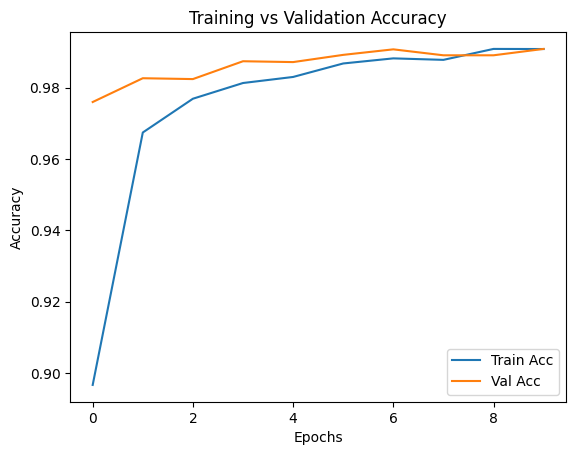

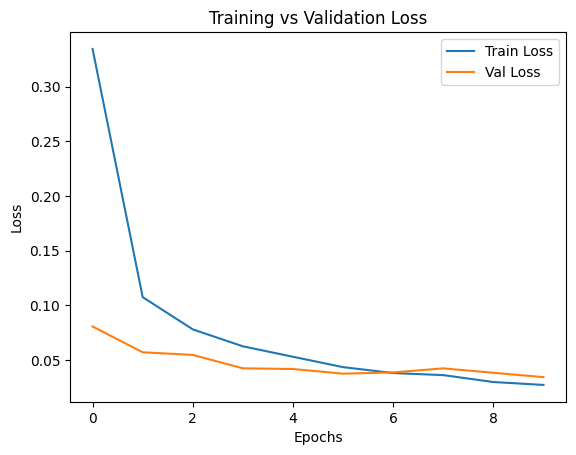

In [ ]:
# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Predict on validation set
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_val_true = np.argmax(y_val, axis=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


###  Advanced Analysis ###

In [ ]:

"""
Generates a detailed classification report showing:
- Precision: proportion of correct positive predictions
- Recall: proportion of actual positives correctly identified
- F1-score: harmonic mean of precision and recall
- Support: number of true instances for each class
"""

print("Classification Report:")
print(classification_report(y_val_true, y_val_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       827
           1       0.99      1.00      1.00       937
           2       0.99      0.99      0.99       835
           3       0.99      0.99      0.99       870
           4       0.99      0.99      0.99       814
           5       0.99      0.98      0.99       759
           6       0.99      1.00      0.99       827
           7       1.00      0.99      0.99       880
           8       0.99      0.99      0.99       813
           9       0.98      0.99      0.99       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400

